# AMAT 502: Modern Computing for Mathematicians
## Lecture 16 - Sorites Paradox and K-Means Clustering
### University at Albany SUNY

# Topics for Today
- Review of Supervised versus Unsupervised Learning
- Introduction to Clustering
    - Partitional Clustering
    - Hierarchical Clustering
- Philosophical Problems with Clustering
    - Sorites Paradox
    - The Vagueness of Bald Men
    - MNIST Data Set
    - Fashion MNIST
- Clustering as an Optimization Problem
    - Variability within a cluster
- The K-Means Algorithm
    - Two implementations
- Project Description

## Recollection of Machine Learning

The machine learning paradigm is in essence a 21st century reboot of the scientific method, except that we don't always require causal explanations, which is something <a href="http://norvig.com/chomsky.html">Noam Chomsky doesn't like about Machine Learning.</a> 

Anyways, the three parts we introduced in previous lectures are:
- Train/observe
- Infer and select a model
- Predict aspects of future data or test your model on a reserved part of the data.

The four main branches of ML are:

1. Supervised Learning
    - Regression
    - Classification
2. Unsupervised Learning
    - Clustering
    - Dimensionality Reduction

<center>
    
![ML Tree](ML-tree.jpeg)

<i> Image taken from <a href="https://medium.com/better-programming/the-data-science-interview-study-guide-c3824cb76c2e">The Data Science Interview Study Guide</a></i>

</center>

## Introduction to Clustering

Following Kevin P. Murphy's *"Machine Learning: A Probabilistic Perspective"*, which is advanced, encyclopedic account of ML, one can think of clustering as having two aspects:

1. **Partitional Clustering:** Attempts to group elements of a data set into an exhaustive, but non-overlapping collection of clusters. Classic examples of algorithms here are **k-means**, **spectral clustering**, Dirichlet Process and Gaussian **mixture models** and so on.

2. **Hierarchical Clustering:** This acknowledges that clusters are inherently fuzzy concepts, which can combine at varying scales of uncertainty or distance. The model for ambiguity here is a tree, called a **dendrogram**. Examples of hierarchichical clustering algorithms are **complete linkage**, **single linkage**, and **average linkage clustering** among others.


## Pictures for the Two Types of Clustering Methods
<center>
    
![K-Means and SLC](KM-HC-clusters.png)

<i>Image taken from <a href="https://medium.com/machine-learning-researcher/clustering-k-mean-and-hierarchical-cluster-fa2de08b4a4b">Wavy AI Research Foundation</a></i>

</center>

## Clustering as a Partition Task

### Mathematical Definition of a Partition

Suppose $X=\{x_1, x_2, \ldots, x_N\}$ is a data set consisting of $N$ elements, which we can think of as "raw data" or some "featurization" of the data.

Under **partitional clustering**, the goal of clustering is to **partition** the set $X$.

This means that we want to decompose $X$ as a union of sets $\{C_{\alpha}\}$ so that

- $X = \cup_{\alpha} C_{\alpha}$, i.e. $X=C_1 \cup C_2 \cup \cdots \cup C_K$

- If $\alpha\neq\beta$ then $C_{\alpha} \cap C_{\beta} = \varnothing$



## Philosophical Problem of Clustering

Coming up with well-defined clusters was a problem that the ancient Greeks also struggled with.

**Eubulides** of Miletus, in the 4th century BCE, outlined several famous paradoxes, including the infamous <a href="https://en.wikipedia.org/wiki/Liar_paradox">Liar Paradox</a>. However the one pertinent to clustering goes by the name of [**Sorites Paradox**](https://en.wikipedia.org/wiki/Sorites_paradox) (pronounced *SOO-RIOT-EEZ*).

The problem is usually stated as follows, note that "sorites" derives from the Greek word for "heap.
>1. A million (1,000,000) grains of sand certainly form a heap of sand
>2. Removing just one grain of sand from a heap of sand, preserves its status as a heap.

>Applying Premise 1 and 2 one million times we can conclude that a single grain of sand is rightly considered a heap. 

![Heaps of Sand](grains-of-sand.jpg)

## Vagueness in the world

Another common example of Sorites Paradox pertains to baldness.

People are born with 90,000 to 120,000 hairs on their heads. Certainly a person with only one hair remaining on their head is bald, but what about 500 hairs? 1000? 10,000? Is this person bald? 

Is language inherently vague? Is the world inherently vague? Are concepts inherently vague and what's the difference between language and concepts? Read more at the [Stanford Encyclopedia of Philosophy](https://plato.stanford.edu/entries/sorites-paradox/), if you have time.

![Bald Man?](bald-man.png)

## Clustering as a Partition Task

### Example: Market Segmentation

From $\S 10.3$ of  James/Witten/Hastie/Tibshirani's *"An Introduction to Statistical Learning: with Applications in R (Springer Texts in Statistics)"*, which is a very good ML text for Masters-level students:

> Another application of clustering arises in marketing. We may have ac- cess to a large number of measurements (e.g. median household income, occupation, distance from nearest urban area, and so forth) for a large number of people. Our goal is to perform **market segmentation** by identifying subgroups of people who might be more receptive to a particular form of advertising, or more likely to purchase a particular product. The task of performing market segmentation amounts to clustering the people in the data set.

## Example: MNIST

![MNIST Data Set](MNIST.png)

## Fashion MNIST

![Fashion MNIST](fashion-MNIST.jpeg)

## Metric Properties of Clustering

Let's assume that our data set $X=\{x_1, x_2, \ldots, x_N\}$ is equipped with a metric, or a **dissimilarity measure**, i.e. a non-negative symmetric function $d:X\times X \to [0,\infty]$ so that $d(x_i,x_i)=0$.

**Question: What's the difference between a dissimilarity measure and a metric?**

In an ideal world, if we have a partition $\mathcal{C}=\{C_{\alpha}\}$ of our set $X$, then we'd like the following implication to hold:

$$\forall x_i, x_j \in C_{\alpha} \Rightarrow d(x_i,x_j) << \min_{x_k\in C_{\beta}} \{d(x_i,x_k), d(x_j, x_k)\} \text{ for } \forall \beta\neq \alpha$$

In other words: **Things in the same cluster should be much more similar to each other than they are to things in different clusters.**

However, sometimes such a requirement is impossible! Or at the very least it requires $2N^2$ computations, which can be quite large.

## Variability within a Cluster

Suppose we have a proposed clustering $\mathcal{C}=\{C_{\alpha}\}$, for each cluster $C_{\alpha}$ we can define

$$W(C_{\alpha})=\sum_{x_i\in C_{\alpha}} d(\overline{C}_{\alpha},x_i)^2$$

to be the **variability within a cluster**. Here 
$$\overline{C}_{\alpha}=\frac{1}{|C_{\alpha}|} \sum_{x_j\in C_{\alpha}} x_j$$ 
is the **vector mean** or **centroid** of the feature vectors $x_j$ inside the cluster $C_{\alpha}$.

$|C_{\alpha}|$ is the number of points in the cluster $C_{\alpha}$.



## Clustering as an Optimization Problem

Recall that our **Train-Model-Predict paradigm** contains the further refinement of the modeling step with a while loop that

1. Represents of the model
2. Assigns a penalty function to the space of models
3. Provide a method for updating and improving the model by decreasing the penalty function

For clustering, this optimization problem is less clear. We have a candidate penalty function, called the *dissimilarity of $\mathcal{C}$* in Guttag, p.384:

$$D(\mathcal{C}) := \sum_{C_{\alpha}\in \mathcal{C}} W(C_{\alpha})= \sum_{C_{\alpha}\in \mathcal{C}} \sum_{x_i\in C_{\alpha}} d(\overline{C}_{\alpha},x_i)^2$$

In theory, our ideal clustering schema would be one that minimized $D(\mathcal{C})$ across all partitions $\mathcal{C}$.

## The Problem with Optimizing over all Partitions

**Questions to consider:** 

1. What's the problem with minimizing the following function over all partitions $\mathcal{C}$ of a data set $X$? **What is the smallest possible value that $D$ can take?**

$$D(\mathcal{C})=\sum_{C_{\alpha}\in \mathcal{C}} \sum_{x_i\in C_{\alpha}} d(\overline{C}_{\alpha},x_i)^2$$

<!--Consider partition into singleton sets-->

2. Suppose we fix the number of clusters to be $K$. How many ways are there of partitioning a set of size $N$ into $K$ clusters? <!-- Check out <a href="https://en.wikipedia.org/wiki/Stirling_numbers_of_the_second_kind">Stirling numbers of the second kind</a>-->


## K-Means Clustering: A Constrained Optimization Problem

**K-means** is a clustering algorithm that has two **inputs:**

1. A data set $X=\{x_1,\ldots,x_N\}$ inside some feature vector space equipped with some metric $d$.
2. An integer $k\geq 1$.

The output is a partition $\mathcal{C}=\{C_1,\ldots, C_k\}$ of the set $X$ into $k$ clusters, so that 

- A point $x_i$ is in cluster $C_{\alpha}$ *if and only if* $x_i$ is closer to the mean of $C_{\alpha}$ than it is to the mean of any other cluster. Said using symbols:
$$x_i\in C_{\alpha} \qquad \Leftrightarrow \qquad d(x_i,\overline{C}_{\alpha}) \leq \min_{\beta\neq \alpha} d(x_i,\overline{C}_{\beta})$$
- The penalty $D(\mathcal{C})\leq D(\mathcal{C}')$ for all other partitions $\mathcal{C}'$ of $X$ into $k$ clusters.

## N=3, K=2 example
<center>
    
![3 Points and k=2](k-means-satisfied.png)

</center>

## Greedy Algorithm Approximation

Finding optimal solution for K-means on a large data set is computationally intractable, but there is an efficient **greedy algorithm** for finding an approximate solution. 

>A **greedy algorithm** is one that chooses the locally optimal solution at each step, even if it need not be globally optimal.

**Discussion Question: What are some examples of a sequence of locally optimal choices that don't lead one to a globally optimal solution?**

## K-Means Algorithm

Here is a *pseudo-code implementation of a greedy approximation* to solving the k-Means optimization problem. It doesn't always find the global optimum because different starting conditions end in potentially different local optima.

Below it is important to remember that the **centroid** of a cluster is the component-wise mean of all the feature vectors for elements of the data set in that cluster.

>1. Randomly assign a number, from 1 to K, to each of the elements in the data set. These serve as initial cluster assignments for the observations.
>2. Iterate until the cluster assignments stop changing:
    - For each of the K clusters, compute the cluster centroid.
    - Now, for each element of the data set, compute which centroid is closest and label that element according to the closest centroid's label.
    - If set of centroids are the same, then stop, otherwise continue.

    

## K=3 Example

![k=3 update exampled](k-means-update.png)
*Image taken from $\S 10.3$ of  James/Witten/Hastie/Tibshirani's *"An Introduction to Statistical Learning: with Applications in R (Springer Texts in Statistics)"*

## Alternative First Step

Different books, such as Guttag and VanderPlas, use a different first step.

> 1. Guess some cluster centers
> 2. Repeat until converged
    1. E-Step: assign points to the nearest cluster center.
    2. M-Step: set the cluster centers to the mean
    
Here the "E-step" or "Expectation step" is so-named because it involves updating our expectation of which cluster each point belongs to. The "M-step" or "Maximization step" is so-named because it involves maximizing some fitness function that defines the location of the cluster centers—in this case, that maximization is accomplished by taking a simple mean of the data in each cluster.

## Alternative First Step: Figure

![EM](EM.png)

## Fixed Point Formulation

Notice that in either case the K-means algorithm returns a **fixed point,** i.e. 
$$\text{a cluster }\mathcal{C} \text{ so that } A(\mathcal{C})=\mathcal{C}$$

# Voronoi Cells

The centroids $\{c_i\}$ of the clusters defines a [**Voronoi Diagram**](https://en.wikipedia.org/wiki/Voronoi_diagram) of the vector space $\mathbb{R}^n$ that the feature vectors live in. This is defined as the partition of a space into regions where each point in a region $R_i$ is closest to the point $x_i$ and no other.

![Voronoi Diagram](Voronoi.png)

## Let's Get Down to the Code

We're going to follow VanderPlas's [In-Depth treatment of $K$-means clustering](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html), but try to pick apart the code more than he does.

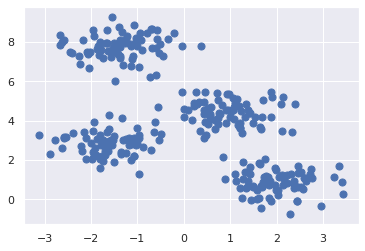

In [1]:
# From https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

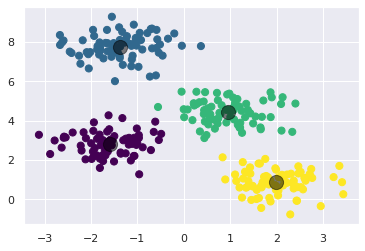

In [2]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

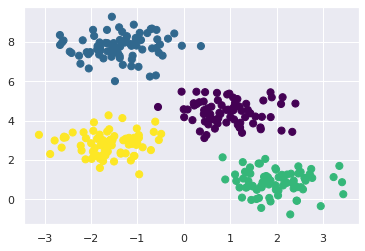

In [3]:
# VanderPlas implementation of k-means 
# https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

## Let's break down the code

**In-Class Questions:**

Explain exactly line by line what the following code does.

<pre>
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
</pre>

In [4]:
X.shape[0]
rando = np.random.RandomState(42)
rando.permutation(X.shape[0])[:4]

array([203, 266, 152,   9])

## Code break down

Explain what this line does:
<pre>
    new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
</pre>

In [5]:
# Following the documentation
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html
a = np.array([[1, 2], [3, 4]])
print(np.mean(a)) # Gives 10/4
print(np.mean(a, axis=0)) # Gives mean of each column
print(np.mean(a, axis=1)) # Gives mean of each row

2.5
[2. 3.]
[1.5 3.5]


In [6]:
# Now what about? Explain
a.mean(0)

array([2., 3.])

## Caveat on Getting Stuck in Local Minima

One of the problems with any greedy algorithm is the possibility of getting stuck in minima/maxima that are locally optimal, but not globally optimal.

Consider a different random seed and it's resulting clustering.



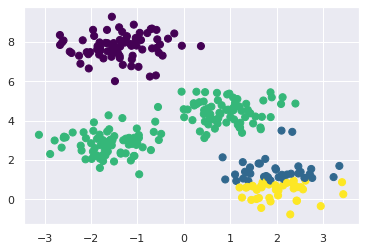

In [7]:
centers, labels = find_clusters(X, 4, rseed=0) # Try 1,2, and 3 for rseed
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

## Project Description

Suppose we have a CSV file with numerical grades and letter grades. A professor has done some implicit clustering in order to assign letter grades: A, B, C, D, and F. 

- What clusters would K-Means with $K=5$ produce? Does K-means match the professors grades?
- Consider signed letter grades A+,A, A-, and so on. What would K-means with $K=13$ produce? Does this match the professors grades?
- Quantify the error in each case and make some nice plots illustrating the two schemas.
